### Deep Learning: Classification with TensorFlow
___

#### Summary:

Deep Learning has grown in popularity recently due to better GPUs and the large amount of data we have access to. Combining the large amount of data with better GPUs, we are able to train deep neural networks in a reasonable amount of time that outperform traditional machine learning models such as Logistic/Softmax Regression, SVM, Naive Bayes, K-Nearest Neighbor, etc.

When building a deep neural network, it is common to use APIs like Tensorflow and Keras. Tensorflow is an API that runs on top of Python and contains many useful low-level functions. Keras is an API that runs on top of TensorFlow and has many high-level functions but is usually more restrictive. When building a neural network, Keras will usually contain all the tools we need, however, it is useful to know how to use TensorFlow and so in this notebook we will strictly be using TensorFlow. Note that we will not get into hyperparameter tuning here and we will not use a validation set (The test set is used as the validaiton set here).
___
#### This notebook will include:
1. Softmax Regression
2. 3-Layer Standard Neural Network (Multilayer Perceptron)
3. 8-Layer Standard Neural Network
4. 3-Layer Convolutional Network
5. 8-Layer Convolutional Network
___
#### Reference: 

Much of what is in this notebook was learned from the Deep Learning Specialization Coursera course by Andrew Ng and from the Tensorflow tutorial at https://www.tensorflow.org/get_started/mnist/pros 

Extracting Datasets/MNIST/train-images-idx3-ubyte.gz
Extracting Datasets/MNIST/train-labels-idx1-ubyte.gz
Extracting Datasets/MNIST/t10k-images-idx3-ubyte.gz
Extracting Datasets/MNIST/t10k-labels-idx1-ubyte.gz
X_train: (55000, 784)
X_test: (10000, 784)
y_train: (55000, 10)
y_test: (10000, 10)


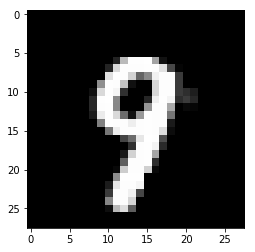

In [2]:
"""
The dataset that will be used for this notebook is the MNIST dataset which consists of hand-drawn digits 
ranging from 0 to 9. The dataset is separated into 55000 training examples, 5000 validation examples
and 10000 test examples. Each example consists of 784 input features corresponding to the 784 pixel values 
of the 28x28 sized image. The dataset has already been preprocessed (divided by 255).
"""
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

%matplotlib inline

# Import the dataset (one-hot encoded)
from tensorflow.examples.tutorials.mnist import input_data
dataset = input_data.read_data_sets("Datasets/MNIST/", one_hot=True)

X_train = dataset.train.images
y_train = dataset.train.labels
X_test = dataset.test.images
y_test = dataset.test.labels

# Printing the dataset shape
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)

# Display an example from the dataset
sample = Image.fromarray(255*X_train[np.random.randint(X_train.shape[0]), :].reshape(28,28))
plt.imshow(sample)

In [4]:
# Softmax regression
"""
The simplest approach to a classification problem with more than 2 categories is to apply softmax
regression. Since softmax regression is essentially a single-layer neural network, it is expected
to perform poorly. 
"""

# Placeholders
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

# Parameters
initializer = tf.contrib.layers.xavier_initializer()
W = tf.Variable(initializer([784, 10]))
b = tf.Variable(tf.zeros([10]))
Z = tf.matmul(X, W) + b # Logit

# Cost
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = Z))

# Single training step
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

# Accuracy
correct_prediction = tf.equal(tf.argmax(Z, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Create a session
sess = tf.InteractiveSession()
# Initialize variables
tf.global_variables_initializer().run()
# Perform 10000 iterations of backward and forward propagation
for i in range(1, 10001):
    batch = dataset.train.next_batch(100)
    sess.run(train_step, feed_dict = {X: batch[0], y: batch[1]})
    if i % 500 == 0:
        train_accuracy = accuracy.eval(feed_dict = {X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))

# Test accuracy    
print('test accuracy', accuracy.eval(feed_dict = {X: dataset.test.images, y: dataset.test.labels}))

step 500, training accuracy 0.89
step 1000, training accuracy 0.88
step 1500, training accuracy 0.9
step 2000, training accuracy 0.94
step 2500, training accuracy 0.93
step 3000, training accuracy 0.93
step 3500, training accuracy 0.96
step 4000, training accuracy 0.92
step 4500, training accuracy 0.88
step 5000, training accuracy 0.95
step 5500, training accuracy 0.93
step 6000, training accuracy 0.94
step 6500, training accuracy 0.91
step 7000, training accuracy 0.97
step 7500, training accuracy 0.96
step 8000, training accuracy 0.95
step 8500, training accuracy 0.93
step 9000, training accuracy 0.9
step 9500, training accuracy 0.96
step 10000, training accuracy 0.9
test accuracy 0.9265


In [5]:
# 3-Layer Standard Neural Network
"""
A 3-layer neural network, although not deep, usually has enough layers to outperform traditional 
Machine Learning algorithms. These extra layers allow the network to learn more complex features 
that can be useful for classification. 
"""

# Parameter initialization functions
def weight_variable(shape):
    initializer = tf.contrib.layers.xavier_initializer()
    return tf.Variable(initializer(shape))

def bias_variable(shape):
    return tf.Variable(tf.zeros(shape))

# Placeholders
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

# First FC layer (20 hidden units)
W_fc1 = weight_variable([784, 20])
b_fc1 = bias_variable([20])
A_fc1 = tf.nn.relu(tf.matmul(X, W_fc1) + b_fc1)

# Second FC layer (20 hidden units)
W_fc2 = weight_variable([20, 20])
b_fc2 = bias_variable([20])
A_fc2 = tf.nn.relu(tf.matmul(A_fc1, W_fc2) + b_fc2)

# Third FC layer (20 hidden units)
W_fc3 = weight_variable([20, 20])
b_fc3 = bias_variable([20])
A_fc3 = tf.nn.relu(tf.matmul(A_fc2, W_fc3) + b_fc3)

# Output softmax layer (10 units corresponding to the labels 0-9)
W_fc4 = weight_variable([20, 10])
b_fc4 = bias_variable([10])
Z_fc4 = tf.matmul(A_fc3, W_fc4) + b_fc4 # Logit

# Cost
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = Z_fc4))

# Single training step
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

# Accuracy
correct_prediction = tf.equal(tf.argmax(Z_fc4, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Create a session
sess = tf.InteractiveSession()
# Initialize variables
tf.global_variables_initializer().run()
# Perform 10000 iterations of backward and forward propagation
for i in range(1, 10001):
    batch = dataset.train.next_batch(100)
    sess.run(train_step, feed_dict = {X: batch[0], y: batch[1]})
    if i % 500 == 0:
        train_accuracy = accuracy.eval(feed_dict = {X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))

# Test accuracy    
print('test accuracy', accuracy.eval(feed_dict = {X: dataset.test.images, y: dataset.test.labels}))

step 500, training accuracy 0.97
step 1000, training accuracy 0.97
step 1500, training accuracy 0.93
step 2000, training accuracy 0.93
step 2500, training accuracy 0.92
step 3000, training accuracy 0.97
step 3500, training accuracy 0.95
step 4000, training accuracy 0.95
step 4500, training accuracy 0.96
step 5000, training accuracy 0.96
step 5500, training accuracy 0.99
step 6000, training accuracy 0.97
step 6500, training accuracy 0.98
step 7000, training accuracy 0.97
step 7500, training accuracy 0.99
step 8000, training accuracy 0.95
step 8500, training accuracy 0.97
step 9000, training accuracy 0.97
step 9500, training accuracy 0.95
step 10000, training accuracy 0.95
test accuracy 0.9621


In [4]:
# 3-layer ConvNet
"""
A Convolutional neural network performs much better than standard neural networks when it comes to 
computer vision tasks. This is because it tries to learn features or rather feature detectors from 
batches of pixels, taking into account the shape of the image. The parameters learned come in the 
form of filters. There are also considerable fewer parameters, which result from parameter sharing 
and sparsity of connections. This particular ConvNet has 2 convolutional layer and 1 fully-connected 
layers.
"""

# Parameter initialization functions
def weight_variable(shape):
    initializer = tf.contrib.layers.xavier_initializer()
    return tf.Variable(initializer(shape))

def bias_variable(shape):
    return tf.Variable(tf.zeros(shape))

# Convolution and pooling functions
def conv2d(X, W): 
    return tf.nn.conv2d(X, W, strides = [1, 1, 1, 1], padding = 'VALID')

def max_pool_2x2(X):
    return tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding = 'SAME')

# Placeholders
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])
keep_prob = tf.placeholder(tf.float32)

# First convolutional layer (32 5x5x1 filters > max-pool)
X_image = tf.reshape(X, [-1, 28, 28, 1])
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
A_conv1 = tf.nn.relu(conv2d(X_image, W_conv1) + b_conv1)
A_pool1 = max_pool_2x2(A_conv1) 
# Output shape (m, 12, 12, 32)

# Second convolutional layer (64 3x3x32 filters > max-pool)
W_conv2 = weight_variable([3, 3, 32, 64])
b_conv2 = bias_variable([64])
A_conv2 = tf.nn.relu(conv2d(A_pool1, W_conv2) + b_conv2)
A_pool2 = max_pool_2x2(A_conv2) 
# Output shape (m, 5, 5, 64)

# Fully-connected layer (1024 hidden units)
W_fc3 = weight_variable([5*5*64, 1024])
b_fc3 = bias_variable([1024])
A_pool2_flat = tf.reshape(A_pool2, [-1, 5*5*64])
A_fc3 = tf.nn.relu(tf.matmul(A_pool2_flat, W_fc3) + b_fc3) 
A_fc3_drop = tf.nn.dropout(A_fc3, keep_prob) # Dropout regularization
# Output shape (m, 1024)

# Output softmax layer (10 units corresponding to the labels 0-9)
W_fc4 = weight_variable([1024, 10])
b_fc4 = bias_variable([10])
Z_fc4 = tf.matmul(A_fc3_drop, W_fc4) + b_fc4 # Logit

# Cost
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = Z_fc4))

# Single training step
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

# Accuracy
correct_prediction = tf.equal(tf.argmax(Z_fc4, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Create a session
sess = tf.InteractiveSession()
# Initialize variables
tf.global_variables_initializer().run()
# Perform 10000 iterations of backward and forward propagation
for i in range(1, 10001):
    batch = dataset.train.next_batch(100)
    sess.run(train_step, feed_dict = {X: batch[0], y: batch[1], keep_prob: 0.5})
    if i % 500 == 0:
        train_accuracy = accuracy.eval(feed_dict = {X: batch[0], y: batch[1], keep_prob: 1})
        print('step %d, training accuracy %g' % (i, train_accuracy))

# Test accuracy    
print('test accuracy', 
      accuracy.eval(feed_dict = {X: dataset.test.images, y: dataset.test.labels, keep_prob: 1}))

step 500, training accuracy 0.99
step 1000, training accuracy 0.99
step 1500, training accuracy 1
step 2000, training accuracy 1
step 2500, training accuracy 0.99
step 3000, training accuracy 1
step 3500, training accuracy 1
step 4000, training accuracy 1
step 4500, training accuracy 1
step 5000, training accuracy 0.99
step 5500, training accuracy 1
step 6000, training accuracy 1
step 6500, training accuracy 1
step 7000, training accuracy 1
step 7500, training accuracy 1
step 8000, training accuracy 1
step 8500, training accuracy 1
step 9000, training accuracy 1
step 9500, training accuracy 1
step 10000, training accuracy 1
test accuracy 0.9929


In [5]:
# Inception Network
"""
An inception network lets the network choose which filters to use when classifying an image. It is 
composed of many inception blocks where an inception block consists of many different convolutions 
with different filters concatenated into one. One would expect the inception network to have an
absurd amount of parameters but the inception network utilizes 1 by 1 convolutions to decrease the
amount of parameters by a considerable amount. The network below consists of 2 convolutional
layers followed by 3 inception blocks. The output of the last inception block is then flattened
and fed into a softmax layer.
"""

# Parameter initialization functions
def weight_variable(shape):
    initializer = tf.contrib.layers.xavier_initializer()
    return tf.Variable(initializer(shape))

def bias_variable(shape):
    return tf.Variable(tf.zeros(shape))

# Convolution function
def conv2d(X, W): 
    return tf.nn.conv2d(X, W, strides = [1, 1, 1, 1], padding = 'VALID')

# Define the Inception block function
def inception_block(X):
    num_channels = X.get_shape()[3].value
    
    # Branch 1
    W_conv1_1 = weight_variable([1, 1, num_channels, 64])
    b_conv1_1 = bias_variable([64])
    A_conv1_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv1_1, strides = [1, 1, 1, 1], 
                                        padding = 'VALID') + b_conv1_1)
    
    # Branch 2
    W_conv2_1 = weight_variable([1, 1, num_channels, 64])
    b_conv2_1 = bias_variable([64])
    A_conv2_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv2_1, strides = [1, 1, 1, 1], 
                                        padding = 'VALID') + b_conv2_1)
    
    W_conv2_2 = weight_variable([3, 3, 64, 128])
    b_conv2_2 = bias_variable([128])
    A_conv2_2 = tf.nn.relu(tf.nn.conv2d(A_conv2_1, W_conv2_2, strides = [1, 1, 1, 1], 
                                        padding = 'SAME') + b_conv2_2)
    
    # Branch 3
    W_conv3_1 = weight_variable([1, 1, num_channels, 16])
    b_conv3_1 = bias_variable([16])
    A_conv3_1 = tf.nn.relu(tf.nn.conv2d(X, W_conv3_1, strides = [1, 1, 1, 1], 
                                        padding = 'VALID') + b_conv3_1)
    
    W_conv3_2 = weight_variable([5, 5, 16, 32])
    b_conv3_2 = bias_variable([32])
    A_conv3_2 = tf.nn.relu(tf.nn.conv2d(A_conv3_1, W_conv3_2, strides = [1, 1, 1, 1], 
                                        padding = 'SAME') + b_conv3_2)
    
    # Branch 4
    A_pool4 = tf.nn.max_pool(X, ksize=[1, 3, 3, 1], strides = [1, 1, 1, 1], padding = 'SAME')
    W_conv4_1 = weight_variable([1, 1, num_channels, 32])
    b_conv4_1 = bias_variable([32])
    A_conv4_1 = tf.nn.relu(tf.nn.conv2d(A_pool4, W_conv4_1, strides = [1, 1, 1, 1], 
                                        padding = 'VALID') + b_conv4_1)
    
    # Concatenate
    A_conv5 = tf.concat([A_conv1_1, A_conv2_2, A_conv3_2, A_conv4_1], axis = -1)
    
    return A_conv5

# Placeholders
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

# First convolutional layer (64 3x3x1 filters)
X_image = tf.reshape(X, [-1, 28, 28, 1])
W_conv1 = weight_variable([3, 3, 1, 64])
b_conv1 = bias_variable([64])
A_conv1 = tf.nn.relu(conv2d(X_image, W_conv1) + b_conv1) 
# Output shape (m, 26, 26, 64)

# Second convolutional layer (128 3x3x64 filters > max pool)
W_conv2 = weight_variable([3, 3, 64, 128])
b_conv2 = bias_variable([128])
A_conv2 = tf.nn.relu(conv2d(A_conv1, W_conv2) + b_conv2)
A_pool2 = tf.nn.max_pool(A_conv2, ksize=[1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME') 
# Output shape (m, 12, 12, 128)

# Inception block (x3)
block1 = inception_block(A_pool2)
block2 = inception_block(block1)
block3 = inception_block(block2)
block3_flat = tf.reshape(block3, [-1, 12*12*256])
# Output shape (m, 36864)

# Output softmax layer (10 units corresponding to the labels 0-9)
W_fc9 = weight_variable([12*12*256, 10])
b_fc9 = bias_variable([10])
Z_fc9 = tf.matmul(block3_flat, W_fc9) + b_fc9 # Logit

# Cost
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = Z_fc9))

# Single training step
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

# Accuracy
correct_prediction = tf.equal(tf.argmax(Z_fc9, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Create a session
sess = tf.InteractiveSession()
# Initialize variables
tf.global_variables_initializer().run()
# Perform 10000 iterations of backward and forward propagation
for i in range(1, 10001):
    batch = dataset.train.next_batch(100)
    sess.run(train_step, feed_dict = {X: batch[0], y: batch[1]})
    if i % 500 == 0:
        train_accuracy = accuracy.eval(feed_dict = {X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))

# Test accuracy
test_acc = 0
for i in range(100): # Separate the test set into 100 batches to avoid ResourceExhaustedError
    test_batch = dataset.test.next_batch(100)
    test_acc += accuracy.eval(feed_dict = {X: test_batch[0], y: test_batch[1]})
test_acc /= 100
print('test accuracy', test_acc)

step 500, training accuracy 0.97
step 1000, training accuracy 0.99
step 1500, training accuracy 1
step 2000, training accuracy 1
step 2500, training accuracy 1
step 3000, training accuracy 1
step 3500, training accuracy 1
step 4000, training accuracy 1
step 4500, training accuracy 1
step 5000, training accuracy 1
step 5500, training accuracy 1
step 6000, training accuracy 1
step 6500, training accuracy 1
step 7000, training accuracy 1
step 7500, training accuracy 1
step 8000, training accuracy 1
step 8500, training accuracy 1
step 9000, training accuracy 1
step 9500, training accuracy 1
step 10000, training accuracy 1
test accuracy 0.9946000051498413


In [8]:
# Residual Network
"""
Experiments have shown that very deep networks degrade. The intuition is that performance worsens 
because it is difficult for a deep network to learn an identity mapping between layers. Residual
networks (ResNets) combined with the use of batch normalization helps resolve this problem. Using a 
ResNet, we are able to train networks with over 100 layers without a drop in performance. This is 
because ResNets are able to easily learn an identity mapping between consecutive layers. A ResNet 
is made up of a series of residual blocks. These blocks contain a 'skip connection' that allows 
the gradient to be directly backpropagated to earlier layers. There are 2 main types of residual 
blocks; the identity block (input has same dimension as output) and the convolutional block (input 
has a different dimension from output). A ResNet is made up of a series of many of these different 
blocks. This particular Resnet consists of only 65 layers, however, they are more commonly used for
much deeper networks. Note that batch normalization acts as a regulator.
"""

# Parameter initialization functions
def weight_variable(shape):
    initializer = tf.contrib.layers.xavier_initializer()
    return tf.Variable(initializer(shape))

def bias_variable(shape):
    return tf.Variable(tf.zeros(shape))

# Define identity block function
def identity_block(X, f, filters):
    F1, F2, F3 = filters
    W_conv1 = weight_variable([1, 1, F3, F1]) #F1 filters of shape (1,1,F3)
    h_conv1 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(X, W_conv1, strides = [1, 1, 1, 1], padding = 'VALID'), axis = 2))
    W_conv2 = weight_variable([f, f, F1, F2]) #F2 filters of shape (f,f,F1)
    h_conv2 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(h_conv1, W_conv2, strides = [1, 1, 1, 1], padding = 'SAME'), axis = 2)) 
    W_conv3 = weight_variable([1, 1, F2, F3]) #F3 filters of shape (1,1,F2)
    h_conv3 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(h_conv2, W_conv3, strides = [1, 1, 1, 1], padding = 'VALID'), axis = 2) + X)
            #F3 = number channels in X
    return h_conv3

# Define convolutional block function
def convolutional_block(X, f, filters, s = 2):
    F1, F2, F3 = filters
    num_channels = X.get_shape()[3].value
    
    W_conv1 = weight_variable([1, 1, num_channels, F1]) #F1 filters of shape (1,1,num_channels)
    h_conv1 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(X, W_conv1, strides = [1, s, s, 1], padding = 'VALID'), axis = 2)) 
    W_conv2 = weight_variable([f, f, F1, F2]) #F2 filters of shape (f,f,F1)
    h_conv2 = tf.nn.relu(tf.layers.batch_normalization(
            tf.nn.conv2d(h_conv1, W_conv2, strides = [1, 1, 1, 1], padding = 'SAME'), axis = 2)) 
    W_conv3 = weight_variable([1, 1, F2, F3]) #F3 filters of shape (1,1,F2)
    z_conv3 = tf.layers.batch_normalization(
            tf.nn.conv2d(h_conv2, W_conv3, strides = [1, 1, 1, 1], padding = 'VALID'), axis = 2) 
    W_shortcut = weight_variable([1, 1, num_channels, F3]) #F3 filters of shape (1,1,num_channels)
    z_shortcut = tf.layers.batch_normalization(
            tf.nn.conv2d(X, W_shortcut, strides = [1, s, s, 1], padding = 'VALID'), axis = 2) 
    h_conv3 = tf.nn.relu(z_conv3 + z_shortcut) 
    
    return h_conv3

# Placeholders
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

# Zero padding
X_image = tf.reshape(X, [-1, 28, 28, 1])
zeropad = tf.pad(X_image, [[0,0], [2, 2], [2, 2],[0,0]]) 
# Output shape (m, 32, 32, 1)

# First convolutional layer
W_conv1 = weight_variable([3, 3, 1, 32])
A_conv1 = tf.nn.relu(tf.layers.batch_normalization(
    tf.nn.conv2d(zeropad, W_conv1, strides = [1, 2, 2, 1], padding = 'SAME'), axis = 2)) 
# Output shape (m, 16, 16, 32)

# Residual block (x12)
block1 = convolutional_block(A_conv1, f = 5, filters = [32, 32, 128], s = 1)
block2 = identity_block(block1, f = 5, filters = [32, 32, 128])
block3 = identity_block(block2, f = 5, filters = [32, 32, 128])

block4 = convolutional_block(block3, f = 3, filters = [64, 64, 256])
block5 = identity_block(block4, f = 3, filters = [64, 64, 256])
block6 = identity_block(block5, f = 3, filters = [64, 64, 256])
block7 = identity_block(block6, f = 3, filters = [64, 64, 256])

block8 = convolutional_block(block7, f = 1, filters = [128, 128, 512])
block9 = identity_block(block8, f = 1, filters = [128, 128, 512])
block10 = identity_block(block9, f = 1, filters = [128, 128, 512])
block11 = identity_block(block10, f = 1, filters = [128, 128, 512])
block12 = identity_block(block11, f = 1, filters = [128, 128, 512])
# Output shape (m, 4, 4, 512)

#Output softmax layer (10 units corresponding to the labels 0-9)
W_fc37 = weight_variable([4*4*512, 10])
b_fc37 = bias_variable([10])
block12_flat = tf.reshape(block12, [-1, 4*4*512])
Z_fc37 = tf.matmul(block12_flat, W_fc37) + b_fc37 # Logit

# Cost
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = Z_fc37))

# Single training step
train_step = tf.train.AdamOptimizer(1e-3).minimize(cross_entropy)

# Accuracy
correct_prediction = tf.equal(tf.argmax(Z_fc37, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Create a session
sess = tf.InteractiveSession()
# Initialize variables
tf.global_variables_initializer().run()
# Perform 10000 iterations of backward and forward propagation
for i in range(1, 10001):
    batch = dataset.train.next_batch(100)
    sess.run(train_step, feed_dict = {X: batch[0], y: batch[1]})
    if i % 500 == 0:
        train_accuracy = accuracy.eval(feed_dict = {X: batch[0], y: batch[1]})
        print('step %d, training accuracy %g' % (i, train_accuracy))

# Test accuracy
test_acc = 0
for i in range(100): # Separate the test set into 100 batches to avoid ResourceExhaustedError
    test_batch = dataset.test.next_batch(100)
    test_acc += accuracy.eval(feed_dict = {X: test_batch[0], y: test_batch[1]})
test_acc /= 100
print('test accuracy', test_acc)

step 500, training accuracy 0.95
step 1000, training accuracy 0.99
step 1500, training accuracy 1
step 2000, training accuracy 0.99
step 2500, training accuracy 1
step 3000, training accuracy 1
step 3500, training accuracy 1
step 4000, training accuracy 1
step 4500, training accuracy 1
step 5000, training accuracy 1
step 5500, training accuracy 1
step 6000, training accuracy 1
step 6500, training accuracy 1
step 7000, training accuracy 1
step 7500, training accuracy 1
step 8000, training accuracy 1
step 8500, training accuracy 1
step 9000, training accuracy 1
step 9500, training accuracy 1
step 10000, training accuracy 1
test accuracy 0.9918000072240829
